In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import funcTest as ft
import importlib

from sklearn.preprocessing import MinMaxScaler

from sklearn import tree,naive_bayes
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
importlib.reload(ft)

<module 'funcTest' from 'F:\\TFG\\datasets\\funcTest.py'>

In [3]:
path = 'F:\\TFG\\datasets\\data_train\\'

cuotaNatDB = pd.read_csv(path + 'cuotaNatDB.csv')
cuotasDB = pd.read_csv(path + 'cuotas3DB.csv')
cuotasDB_tend5 = pd.read_csv(path + 'cuotas3DB_tend5.csv')
cuotasDB_tend3 = pd.read_csv(path + 'cuotasDB_tend3.csv')
cuotasDB_tend3_norm = pd.read_csv(path + 'cuotasDB_tend3_norm.csv')
cuotasDB_diftend5_norm = pd.read_csv(path + 'cuotasDB_diftend5_norm.csv')

statsDB_3part = pd.read_csv(path + 'Nature_wStatsDB_v1.csv')

#### ENTRENAMIENTO
Con GridSearch o simplemente con Validación Cruzada

In [4]:
def train_wGridSearch(clf,trainX,trainY,param,cv=5):
    """
    Función para entrenar con hiperparámetros óptimos a partir de una busqueda por rejilla
    """
    clf_grid = GridSearchCV(estimator=clf, param_grid=param, cv=cv)
    score = cross_validate(clf_grid,X=trainX,y=trainY, cv=5, return_estimator=True)    
    return score

def train_wCrossVal(clf,trainX,trainY,cv=5):
    score = cross_validate(clf,X=trainX,y=trainY, cv=5, return_estimator=True)    
    return score

### CUOTAS

#### OPTIMIZACIONES

##### Vamos a optimizar el árbol de decisión de la Version 1

In [5]:
param = {
    'splitter' : ['best', 'random'],
    'max_depth' : [None,2,5,10,20],
    'min_samples_split' : [2,3,5,10],
    'min_samples_leaf' : [1,2,4,5,10,50],
    'random_state' : [None],
    'max_leaf_nodes' : [None, 10,20,50,100,150,200,500]
}

Empezamos con CUOTAS_DB

In [6]:
cuotasDB

,B365H,B365A,res
0,2.40,2.90,1
1,4.00,1.85,1
2,3.10,2.25,-1
3,1.53,5.75,-1
4,1.53,6.00,-1
...,...,...,...
1821,1.62,5.50,0
1822,8.00,1.45,0
1823,2.38,3.20,1
1824,1.75,4.50,-1


In [7]:
cDB = cuotasDB
cDB = ft.normalDB(cDB,scaler=MinMaxScaler())
cDB,trainX,trainY,testX,testY = ft.preprocessDB(cDB)

In [8]:
cDB

,B365H,B365A,res
258,0.045591,0.080925,1
984,0.087675,0.042896,0
922,0.002004,0.756617,-1
351,0.448898,0.006085,1
231,0.078156,0.047764,0
...,...,...,...
1685,0.062625,0.064497,-1
1728,0.103206,0.035291,-1
79,0.799599,0.002738,1
1662,0.055110,0.072102,-1


In [35]:
score = train_wGridSearch(tree.DecisionTreeClassifier(),trainX,trainY,param)

In [37]:
estimators = score['estimator']

In [44]:
for e in estimators:
    print(e.best_estimator_,e.best_score_)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=500, min_samples_leaf=5,
                       min_samples_split=3, splitter='random') 0.5487465993004275
DecisionTreeClassifier(max_depth=20, max_leaf_nodes=150, min_samples_leaf=50,
                       min_samples_split=3, splitter='random') 0.5527788573649437
DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                       splitter='random') 0.5571447078637128
DecisionTreeClassifier(max_depth=10, max_leaf_nodes=150, min_samples_leaf=10,
                       splitter='random') 0.559560823940925
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=200, min_samples_leaf=2,
                       splitter='random') 0.551518979142376


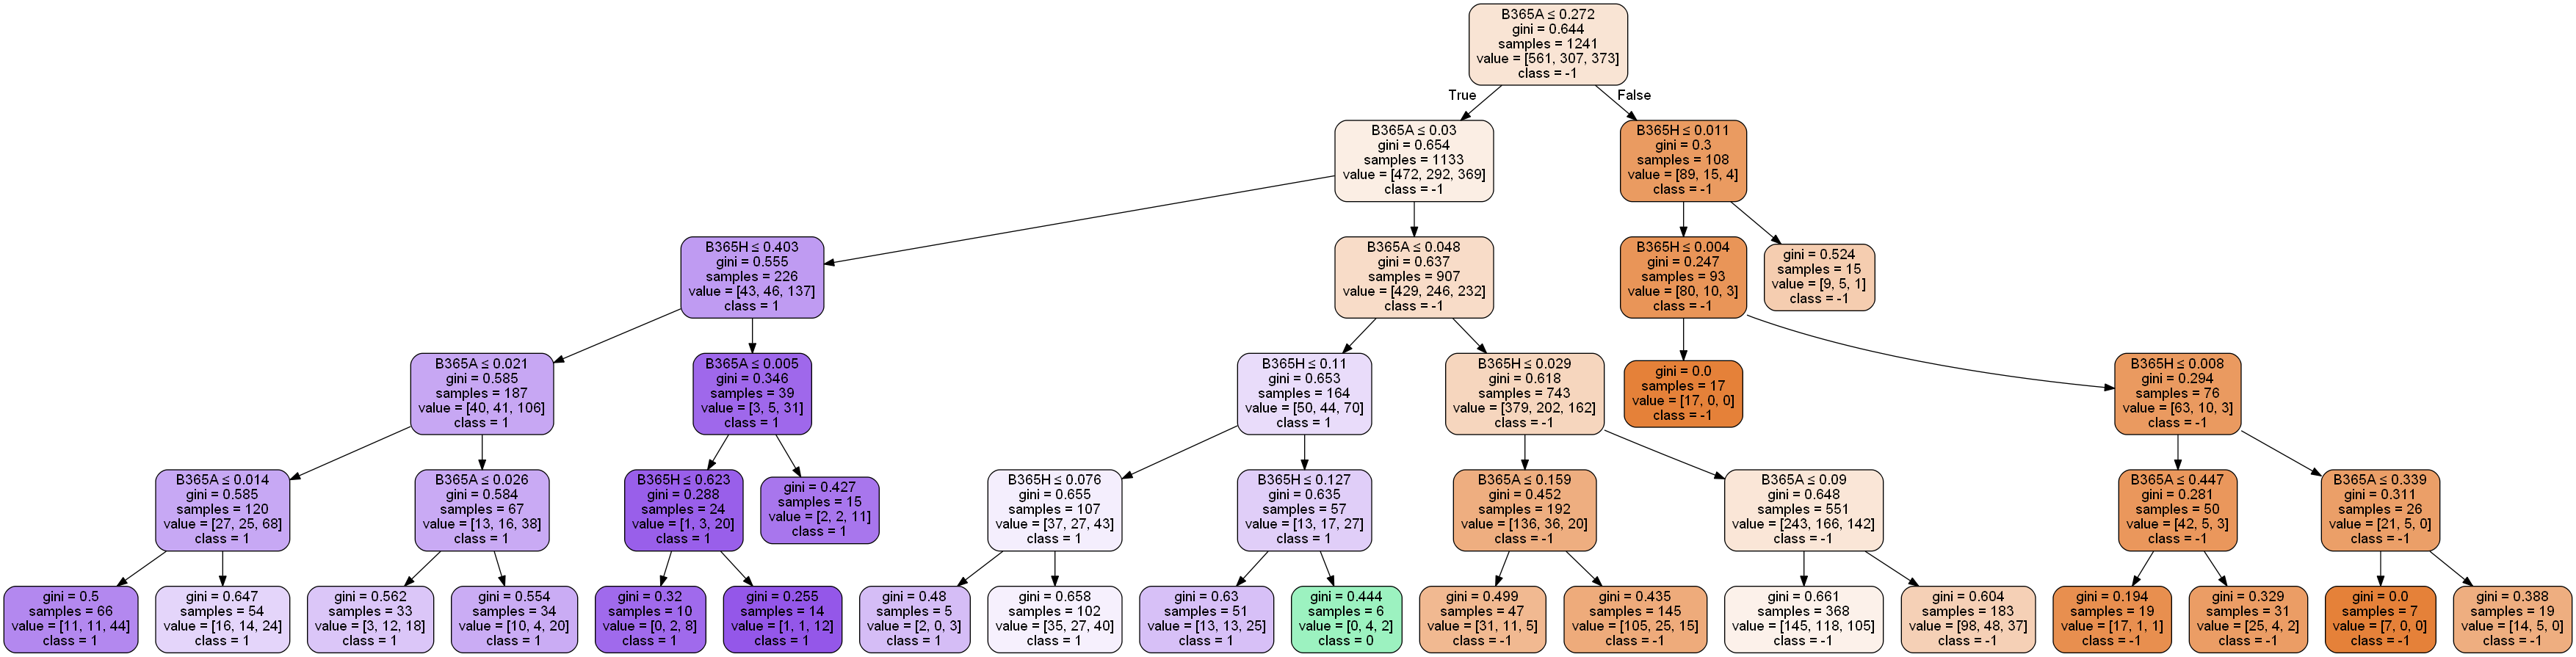

In [46]:
ft.tree_png(c=estimators[0].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A'])

In [66]:
tree_res = estimators[0].best_estimator_
tree_res.score(testX,testY)

0.5766423357664233

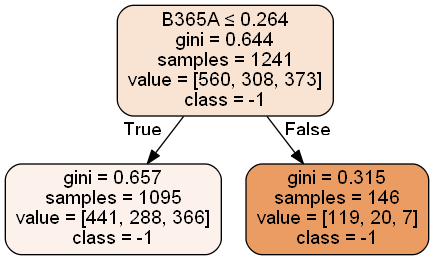

In [47]:
ft.tree_png(c=estimators[1].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A'])

In [57]:
tree_res = estimators[1].best_estimator_
tree_res.score(testX,testY)

0.4635036496350365

In [56]:
(list(testY)).count(-1) / len(testY)

0.4635036496350365

Este árbol es equivalente al clasificador ZeroR ya que clasifica siempre a la misma clase.

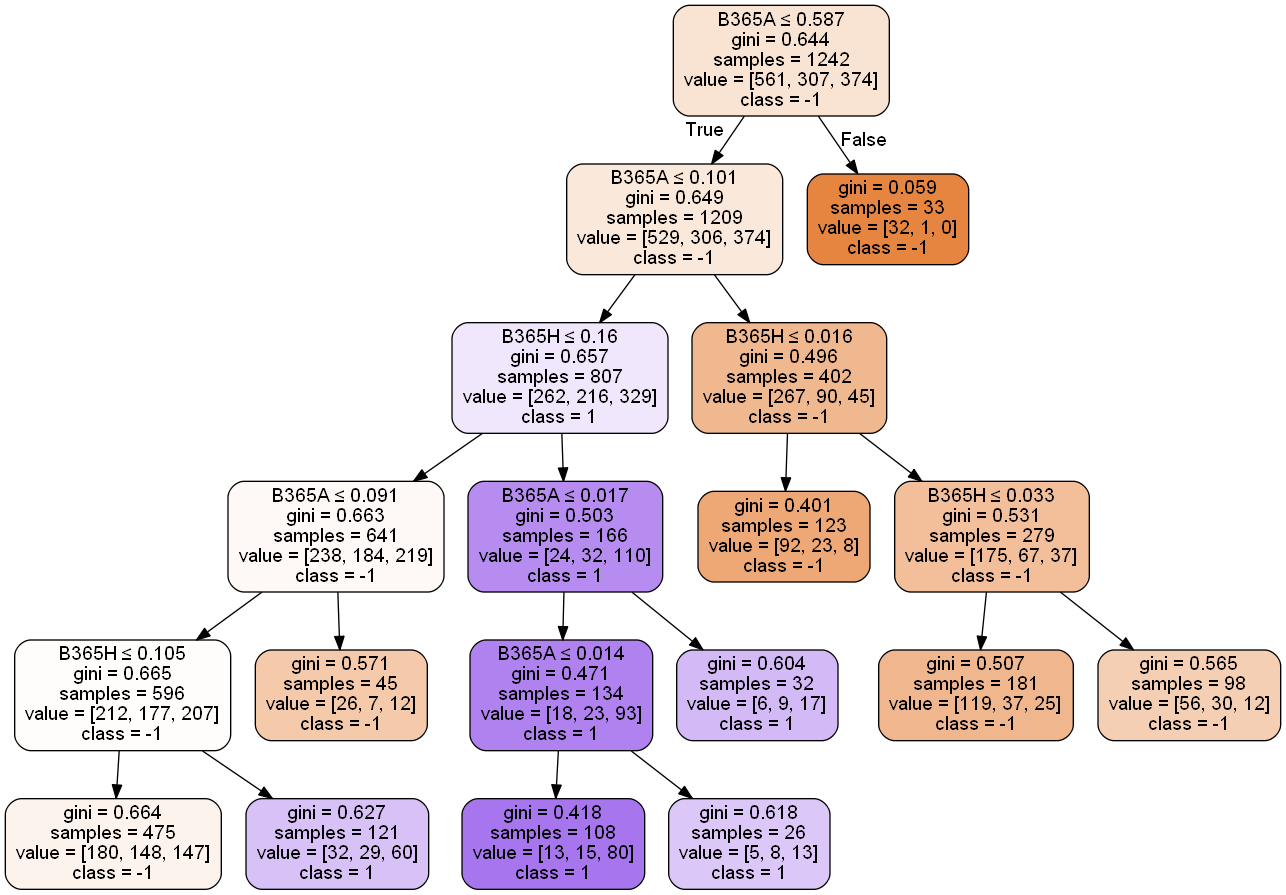

In [48]:
ft.tree_png(c=estimators[2].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A'])

In [62]:
tree_res = estimators[2].best_estimator_
tree_res.score(testX,testY)

0.5656934306569343

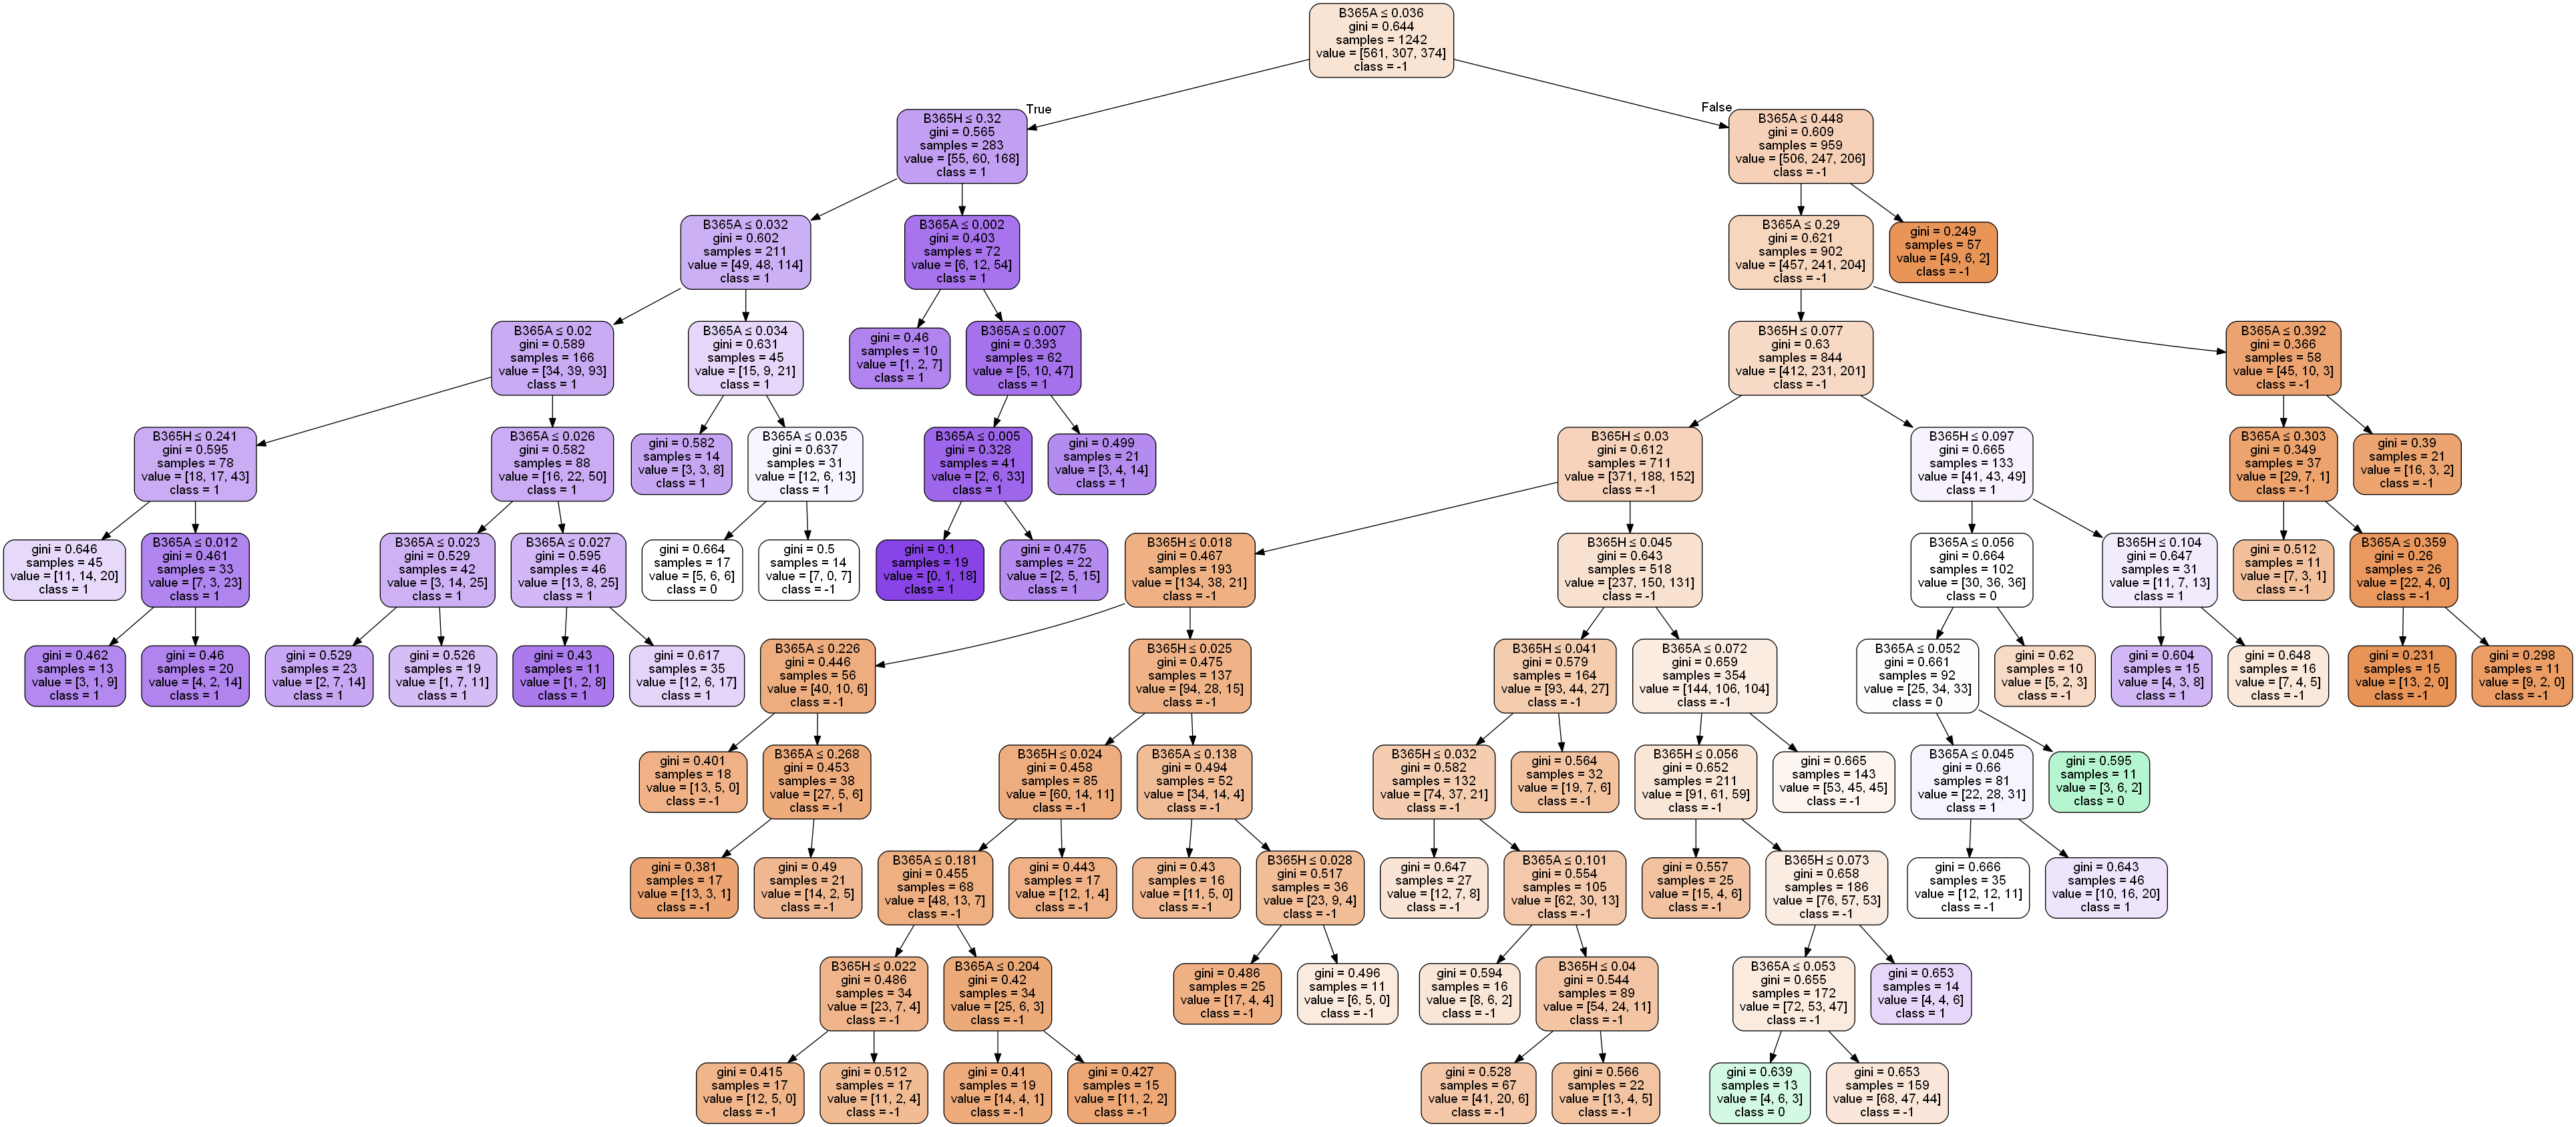

In [49]:
ft.tree_png(c=estimators[3].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A'])

In [65]:
tree_res = estimators[3].best_estimator_
tree_res.score(testX,testY)

0.5583941605839416

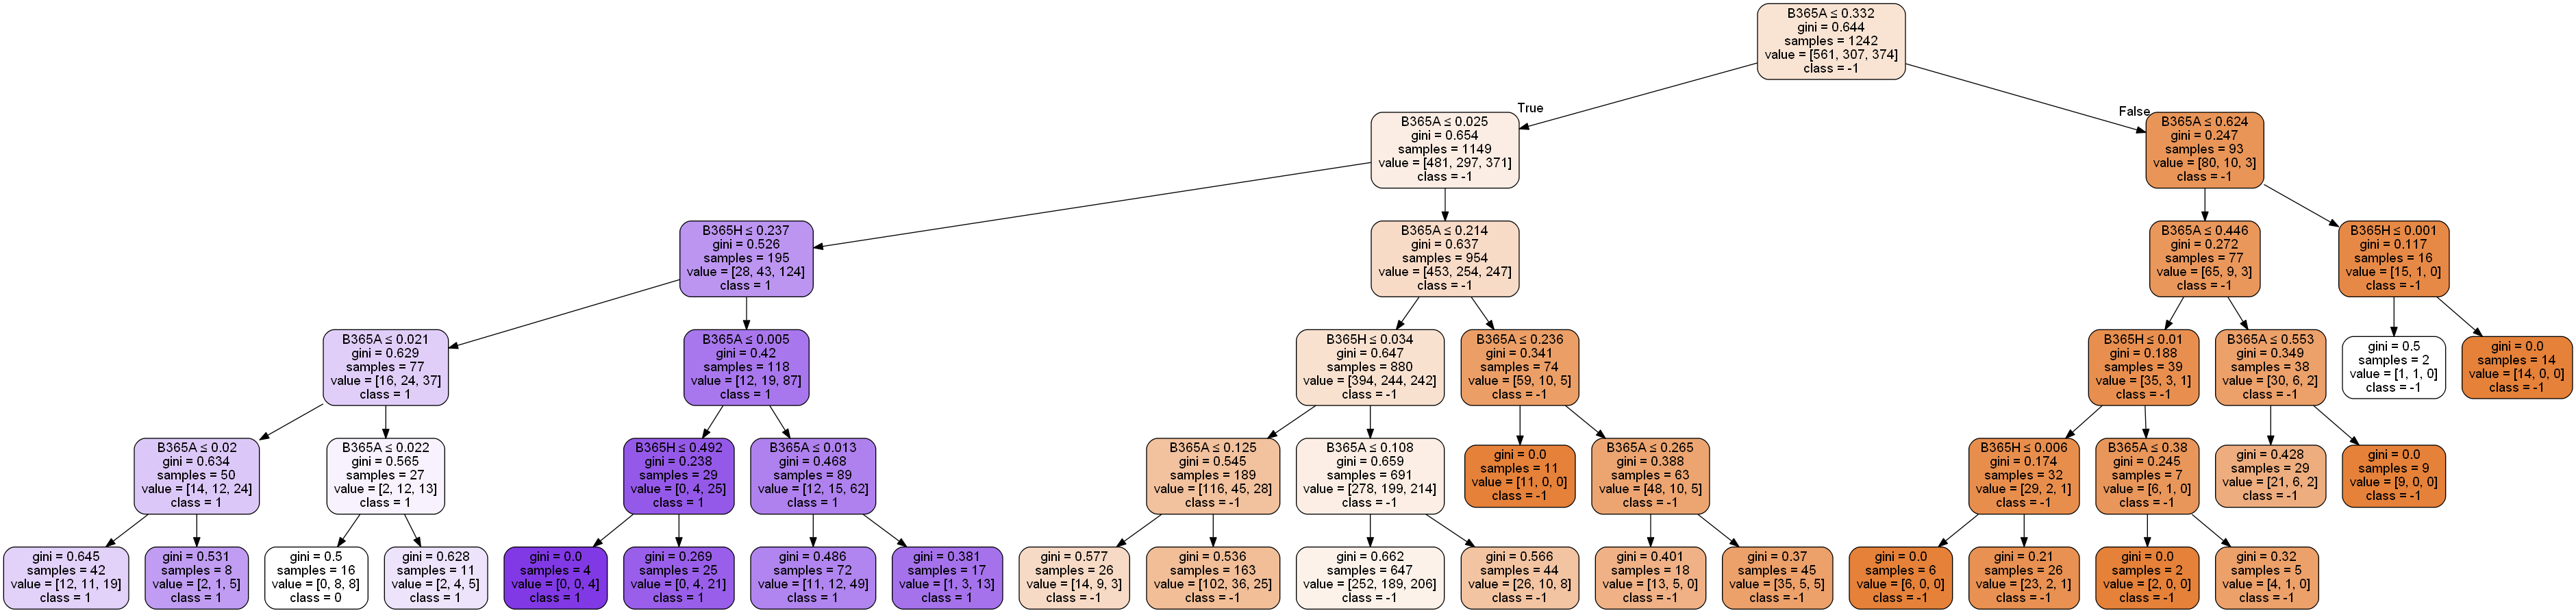

In [51]:
ft.tree_png(c=estimators[4].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A'])

In [64]:
tree_res = estimators[4].best_estimator_
tree_res.score(testX,testY)

0.551094890510949

##### vamos a volver a evaluar Naive Bayes

In [77]:
score = train_wCrossVal(naive_bayes.GaussianNB(),trainX,trainY)
score

{'fit_time': array([0.00310588, 0.00298595, 0.00199747, 0.00199461, 0.00199485]),
 'score_time': array([0.00100279, 0.        , 0.0009973 , 0.00182414, 0.00099707]),
 'estimator': [GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB()],
 'test_score': array([0.54019293, 0.54019293, 0.54193548, 0.53870968, 0.5483871 ])}

In [87]:
for e in estimators:
    print(e.score(testX,testY))

0.5802919708029197
0.572992700729927
0.572992700729927
0.5802919708029197
0.5802919708029197


## TENDENCIAS N = 5

##### vamos a optimizar el árbol de decisión

In [119]:
cuotasDB_diftend5_norm

,B365H,B365A,dif_tend,res
0,0.068136,0.053848,0.413793,1
1,0.148297,0.021904,0.517241,1
2,0.103206,0.034074,0.724138,-1
3,0.024549,0.140554,0.482759,-1
4,0.024549,0.148159,0.379310,-1
...,...,...,...,...
1575,0.045591,0.087314,0.448276,-1
1576,0.549098,0.003651,0.827586,1
1577,0.093186,0.038637,0.724138,0
1578,0.799599,0.001217,0.758621,1


In [120]:
cDB = cuotasDB_diftend5_norm
cDB = ft.normalDB(cDB,scaler=MinMaxScaler())
cDB,trainX,trainY,testX,testY = ft.preprocessDB(cDB)

In [121]:
score = train_wGridSearch(tree.DecisionTreeClassifier(),trainX,trainY,param)
score

{'fit_time': array([28.88077021, 29.02904367, 28.85349774, 28.78390098, 29.00285769]),
 'score_time': array([0.00099802, 0.00099635, 0.00099754, 0.00099683, 0.00099635]),
 'estimator': [GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
               param_grid={'max_depth': [None, 2, 5, 10, 20],
                           'max_leaf_nodes': [None, 10, 20, 50, 100, 150, 200,
                                              500],
                           'min_samples_leaf': [1, 2, 4, 5, 10, 50],
                           'min_samples_split': [2, 3, 5, 10],
                           'random_state': [None],
                           'splitter': ['best', 'random']}),
  GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
               param_grid={'max_depth': [None, 2, 5, 10, 20],
                           'max_leaf_nodes': [None, 10, 20, 50, 100, 150, 200,
                                              500],
                           'min_samples_leaf': [1, 2, 4, 5, 10, 50],
   

In [122]:
estimators = score['estimator']

for e in estimators:
    print(e.best_estimator_,e.best_score_)
    print(f'Su resultado en el test es: {e.score(testX,testY)}')
    print()

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, splitter='random') 0.5493544881547491
Su resultado en el test es: 0.5358649789029536

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=5, splitter='random') 0.551214953271028
Su resultado en el test es: 0.540084388185654

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=10, min_samples_leaf=10,
                       min_samples_split=3, splitter='random') 0.5465637904803303
Su resultado en el test es: 0.5189873417721519

DecisionTreeClassifier(max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=5, splitter='random') 0.5562790697674419
Su resultado en el test es: 0.5316455696202531

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       min_samples_split=10, splitter='random') 0.549767441860465
Su resultado en el test es: 0.5316455696202531



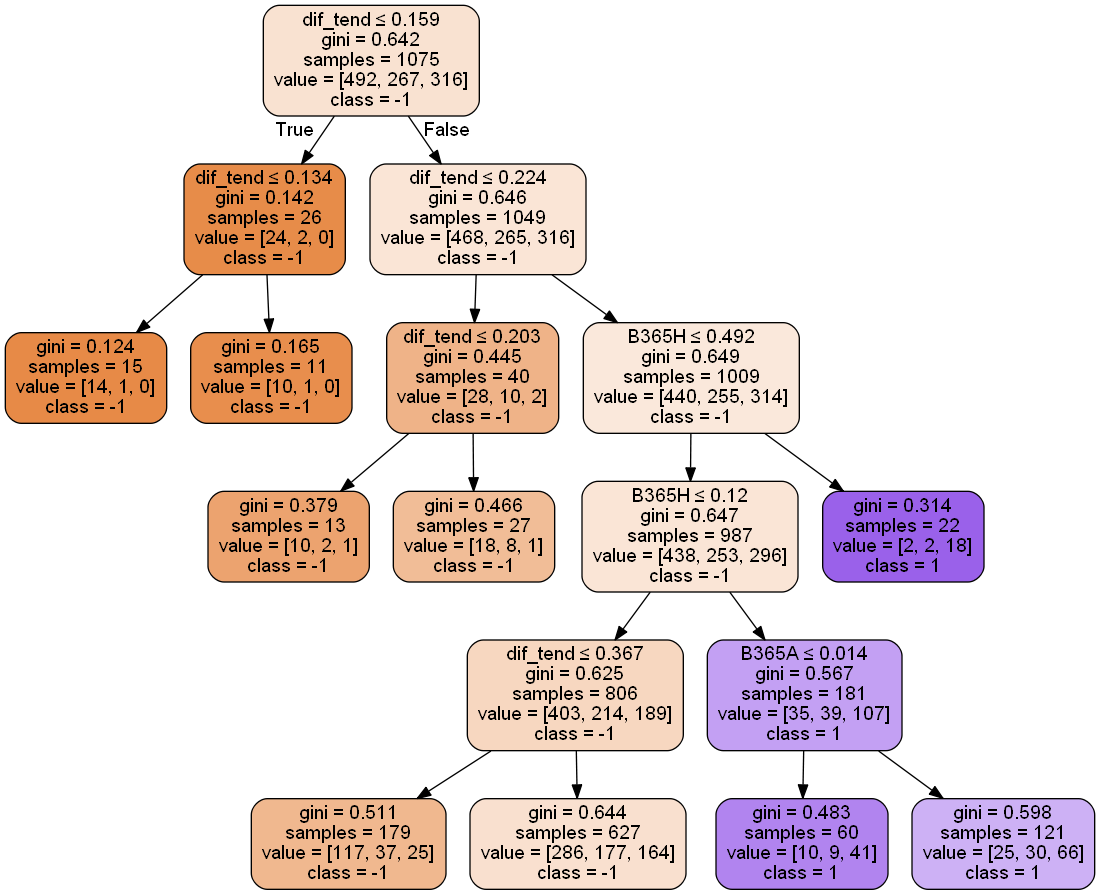

In [125]:
ft.tree_png(c=estimators[4].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A','dif_tend'])

##### Naive Bayes

In [126]:
score = train_wCrossVal(naive_bayes.GaussianNB(),trainX,trainY)
score

{'fit_time': array([0.00199437, 0.00199914, 0.00199914, 0.0029974 , 0.00196075]),
 'score_time': array([0.00099802, 0.00100136, 0.00199556, 0.00102353, 0.00202608]),
 'estimator': [GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB()],
 'test_score': array([0.5204461 , 0.53531599, 0.54275093, 0.5261194 , 0.53358209])}

In [127]:
estimators = score['estimator']

for e,i in zip(estimators,range(0,5)):
    print(score['test_score'][i])
    print(f'Su resultado en el test es: {e.score(testX,testY)}')
    print()

0.5204460966542751
Su resultado en el test es: 0.5147679324894515

0.5353159851301115
Su resultado en el test es: 0.5189873417721519

0.5427509293680297
Su resultado en el test es: 0.5189873417721519

0.5261194029850746
Su resultado en el test es: 0.5189873417721519

0.5335820895522388
Su resultado en el test es: 0.510548523206751



## TENDENCIAS N = 3

In [134]:
cDB = cuotasDB_tend3_norm
cDB = ft.normalDB(cDB,scaler=MinMaxScaler())
cDB,trainX,trainY,testX,testY = ft.preprocessDB(cDB)

In [138]:
score = train_wGridSearch(tree.DecisionTreeClassifier(),trainX,trainY,param)
score

{'fit_time': array([29.80273128, 29.21044564, 28.76996422, 29.08764577, 28.47110796]),
 'score_time': array([0.00199556, 0.00099707, 0.00099778, 0.00099468, 0.00099993]),
 'estimator': [GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
               param_grid={'max_depth': [None, 2, 5, 10, 20],
                           'max_leaf_nodes': [None, 10, 20, 50, 100, 150, 200,
                                              500],
                           'min_samples_leaf': [1, 2, 4, 5, 10, 50],
                           'min_samples_split': [2, 3, 5, 10],
                           'random_state': [None],
                           'splitter': ['best', 'random']}),
  GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
               param_grid={'max_depth': [None, 2, 5, 10, 20],
                           'max_leaf_nodes': [None, 10, 20, 50, 100, 150, 200,
                                              500],
                           'min_samples_leaf': [1, 2, 4, 5, 10, 50],
   

In [139]:
estimators = score['estimator']

for e in estimators:
    print(e.best_estimator_,e.best_score_)
    print(f'Su resultado en el test es: {e.score(testX,testY)}')
    print()

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=150, min_samples_leaf=10,
                       min_samples_split=3, splitter='random') 0.5473684210526316
Su resultado en el test es: 0.5079365079365079

DecisionTreeClassifier(max_leaf_nodes=20, min_samples_leaf=4,
                       min_samples_split=5, splitter='random') 0.559120508695319
Su resultado en el test es: 0.5595238095238095

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=10,
                       splitter='random') 0.5468819428483872
Su resultado en el test es: 0.5198412698412699

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=10,
                       min_samples_split=3, splitter='random') 0.551267907760668
Su resultado en el test es: 0.5833333333333334

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, splitter='random') 0.5547345437830383
Su resultado en el test es: 0.5119047619047619



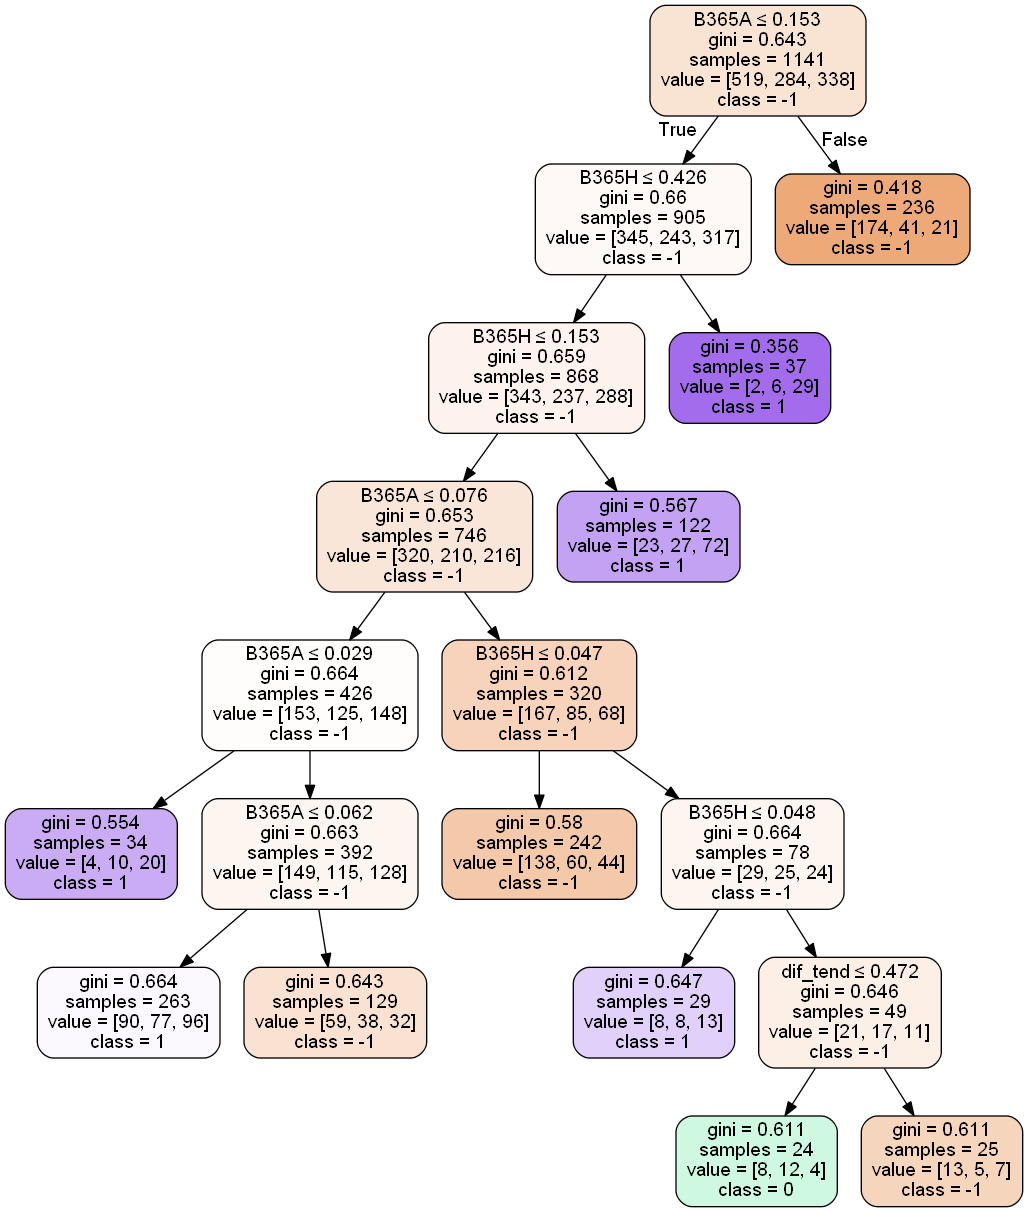

In [141]:
ft.tree_png(c=estimators[3].best_estimator_,c_names=['-1','0','1'], ft_names=['B365H','B365A','dif_tend'])

In [142]:
score = train_wCrossVal(naive_bayes.GaussianNB(),trainX,trainY)
score

{'fit_time': array([0.00199556, 0.00199747, 0.00199628, 0.00199461, 0.00099754]),
 'score_time': array([0.0009973 , 0.00099778, 0.00099802, 0.00099778, 0.00199389]),
 'estimator': [GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB()],
 'test_score': array([0.55244755, 0.51929825, 0.53684211, 0.5122807 , 0.53333333])}

In [143]:
estimators = score['estimator']

for e,i in zip(estimators,range(0,5)):
    print(score['test_score'][i])
    print(f'Su resultado en el test es: {e.score(testX,testY)}')
    print()

0.5524475524475524
Su resultado en el test es: 0.5238095238095238

0.519298245614035
Su resultado en el test es: 0.5238095238095238

0.5368421052631579
Su resultado en el test es: 0.5238095238095238

0.512280701754386
Su resultado en el test es: 0.5317460317460317

0.5333333333333333
Su resultado en el test es: 0.5238095238095238



## DATASET NATURE CON ESTADÍSTICAS

A este dataset le añadimos más características como disparos a puerta, faltas cometidas, tarjetas... 

In [11]:
statsDB_tend3 = pd.read_csv('F:\\TFG\\datasets\\data_train\\statsDB_tend3.csv')
statsDB_tend3

,wyId,competitionId,seasonId,roundId,dateutc,winner,teamId_home,score_home,scoreHT_home,teamId_away,...,tend_goalsA,tend_HS,tend_AS,tend_HST,tend_AST,tend_HC,tend_AC,tend_HF,tend_AF,res
0,2576335,524,181248,4406278,2018-05-20 18:45:00,3161,3162,2,2,3161,...,5.0,42.0,20.0,23.0,8.0,15.0,6.0,33.0,35.0,1
1,2576336,524,181248,4406278,2018-05-20 18:45:00,3158,3315,0,0,3158,...,6.0,49.0,46.0,20.0,19.0,20.0,16.0,51.0,36.0,1
2,2576329,524,181248,4406278,2018-05-20 16:00:00,3173,3173,1,0,3172,...,6.0,28.0,33.0,10.0,16.0,12.0,18.0,40.0,27.0,-1
3,2576330,524,181248,4406278,2018-05-20 16:00:00,3165,3165,1,0,3219,...,5.0,41.0,39.0,16.0,14.0,9.0,11.0,39.0,43.0,-1
4,2576331,524,181248,4406278,2018-05-20 16:00:00,3163,3163,1,1,3166,...,4.0,46.0,39.0,18.0,16.0,12.0,10.0,42.0,32.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2565552,795,181144,4406122,2017-08-19 20:15:00,0,680,1,1,691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1822,2565551,795,181144,4406122,2017-08-19 18:15:00,0,756,2,2,679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1823,2565549,795,181144,4406122,2017-08-19 16:15:00,687,692,2,1,687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1824,2565556,795,181144,4406122,2017-08-18 20:15:00,674,674,1,1,714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


Vamos a quedarnos con los atributos que nos interesan para entrenar el modelo

In [15]:
statsDB_tend3 = statsDB_tend3[statsDB_tend3.columns[12:]]

In [19]:
statsDB_tend3

,HS,AS,HST,AST,HC,AC,HF,AF,B365H,B365D,...,tend_goalsA,tend_HS,tend_AS,tend_HST,tend_AST,tend_HC,tend_AC,tend_HF,tend_AF,res
0,14,15,4,6,10,4,12,13,2.40,3.50,...,5.0,42.0,20.0,23.0,8.0,15.0,6.0,33.0,35.0,1
1,16,15,3,6,5,9,14,8,4.00,3.80,...,6.0,49.0,46.0,20.0,19.0,20.0,16.0,51.0,36.0,1
2,6,12,4,4,5,11,17,14,3.10,3.60,...,6.0,28.0,33.0,10.0,16.0,12.0,18.0,40.0,27.0,-1
3,8,12,5,1,2,4,13,9,1.53,4.50,...,5.0,41.0,39.0,16.0,14.0,9.0,11.0,39.0,43.0,-1
4,20,8,5,5,10,2,9,11,1.53,4.33,...,4.0,46.0,39.0,18.0,16.0,12.0,10.0,42.0,32.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,9,9,4,6,7,3,14,12,1.62,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1822,13,9,6,3,6,0,15,15,8.00,4.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1823,16,13,5,6,5,4,12,11,2.38,3.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1824,22,5,6,4,5,2,25,13,1.75,3.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
